# Google Trend

### Import dulu yahh

In [117]:
import datetime as dt

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

#pip
from gsvi.connection import GoogleConnection
from gsvi.timeseries import SVSeries
from gsvi.catcodes import CategoryCodes

In [118]:
# Koneksi ke google dulu beuh
connection = GoogleConnection()

### Mengecek Trend Dalam Satu Keyword

In [222]:
katakunci = {'key': 'bokep', 'geo': 'ID'}
awal = dt.datetime(year=2011, month=1, day=1)  #format 2019-11-13 00:00:00
akhir = dt.datetime(year=2018, month=12, day=30)
waktu = 'DAY' #DAY, HOUR, MONTH, YEAR
katagori = CategoryCodes.NEWS

In [223]:
series_single = SVSeries.univariate(connection=connection, query=katakunci,
                                   start=awal, end=akhir, granularity=waktu,
                                   category=katagori)

In [224]:
data_single = series_single.get_data()

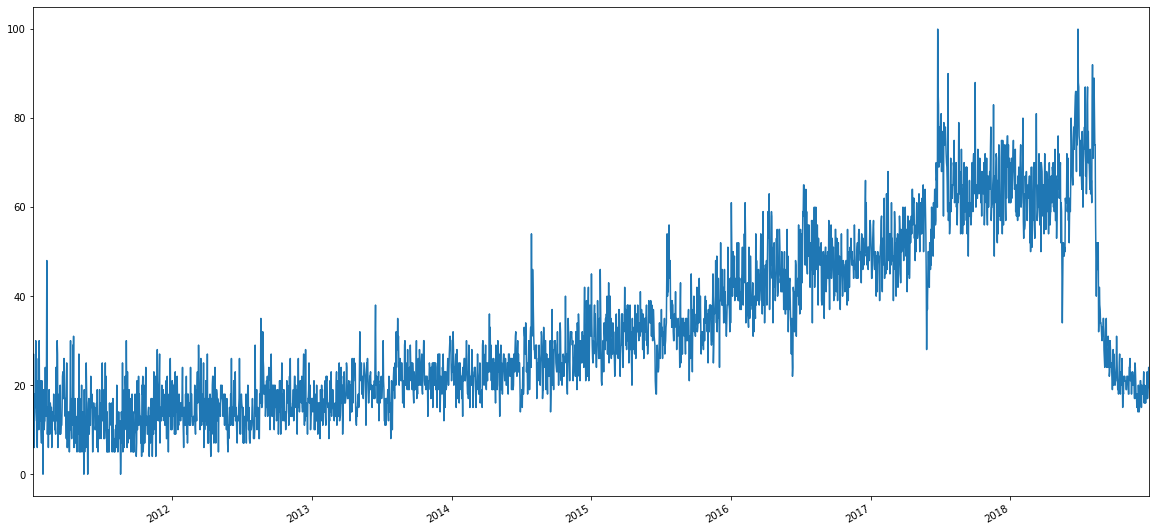

In [225]:
data_single.plot()

### Apa yang akan terjadi jika tingkat trend topik "bokep" meningkat ? apakah jumlah pemerkosaan meningkat? atau mulai banyak terjadi pengimpangan?

In [226]:
series_single.request_structure

{'layer_0': [{'key': 'bokep',
   'geo': 'ID',
   'range': (datetime.datetime(2018, 4, 5, 0, 0),
    datetime.datetime(2018, 12, 30, 0, 0))},
  {'key': 'bokep',
   'geo': 'ID',
   'range': (datetime.datetime(2017, 7, 9, 0, 0),
    datetime.datetime(2018, 4, 4, 0, 0))},
  {'key': 'bokep',
   'geo': 'ID',
   'range': (datetime.datetime(2016, 10, 12, 0, 0),
    datetime.datetime(2017, 7, 8, 0, 0))},
  {'key': 'bokep',
   'geo': 'ID',
   'range': (datetime.datetime(2016, 1, 16, 0, 0),
    datetime.datetime(2016, 10, 11, 0, 0))},
  {'key': 'bokep',
   'geo': 'ID',
   'range': (datetime.datetime(2015, 4, 21, 0, 0),
    datetime.datetime(2016, 1, 15, 0, 0))},
  {'key': 'bokep',
   'geo': 'ID',
   'range': (datetime.datetime(2014, 7, 25, 0, 0),
    datetime.datetime(2015, 4, 20, 0, 0))},
  {'key': 'bokep',
   'geo': 'ID',
   'range': (datetime.datetime(2013, 10, 28, 0, 0),
    datetime.datetime(2014, 7, 24, 0, 0))},
  {'key': 'bokep',
   'geo': 'ID',
   'range': (datetime.datetime(2013, 1, 31, 

### Mengecek Trend Dalam Banyak Keyword

In [255]:
query_multi = [{'key': 'Bokep', 'geo': 'ID'},
               {'key': 'Perkosa', 'geo': 'ID'},
               {'key': 'Cabul', 'geo': 'ID'},
               {'key': 'Crot', 'geo': 'ID'},
               {'key': 'Pembunuhan', 'geo': 'ID'}]
start_multi = dt.datetime(year=2004, month=1, day=1)
end_multi = dt.datetime(year=2019, month=6, day=1)

In [256]:
series_multi = SVSeries.multivariate(connection=connection, queries=query_multi,
                                   start=start_multi, end=end_multi, granularity='MONTH',
                                   category=CategoryCodes.NEWS)

In [257]:
data_multi = series_multi.get_data()

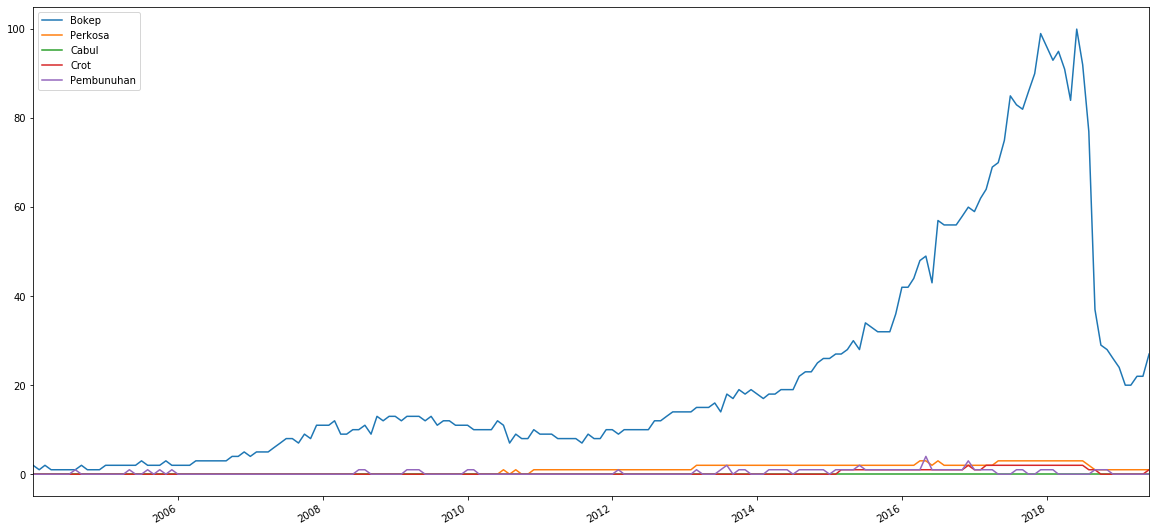

In [258]:
data_multi.plot()

In [259]:
series_multi.request_structure

{'layer_0': [{'key': 'Bokep',
   'geo': 'ID',
   'range': (datetime.datetime(2004, 1, 1, 0, 0),
    datetime.datetime(2019, 6, 1, 0, 0))},
  {'key': 'Perkosa',
   'geo': 'ID',
   'range': (datetime.datetime(2004, 1, 1, 0, 0),
    datetime.datetime(2019, 6, 1, 0, 0))},
  {'key': 'Cabul',
   'geo': 'ID',
   'range': (datetime.datetime(2004, 1, 1, 0, 0),
    datetime.datetime(2019, 6, 1, 0, 0))},
  {'key': 'Crot',
   'geo': 'ID',
   'range': (datetime.datetime(2004, 1, 1, 0, 0),
    datetime.datetime(2019, 6, 1, 0, 0))},
  {'key': 'Pembunuhan',
   'geo': 'ID',
   'range': (datetime.datetime(2004, 1, 1, 0, 0),
    datetime.datetime(2019, 6, 1, 0, 0))}]}

## Explosasi dengan PY TREND

In [126]:
from pytrends.request import TrendReq
pytrend = TrendReq()

In [239]:
pytrend.build_payload(kw_list=['bokep', 'pemerkosaan'])

In [240]:
# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

            bokep  pemerkosaan isPartial
date                                    
2014-11-16     23            1     False
2014-11-23     22            1     False
2014-11-30     23            1     False
2014-12-07     23            1     False
2014-12-14     24            1     False


In [245]:
# Interest by Region
interest_by_region_df = pytrend.interest_by_region()
print(interest_by_region_df)


                bokep  pemerkosaan
geoName                           
Afghanistan         0            0
Albania             0            0
Algeria             0            0
American Samoa      0            0
Andorra             0            0
...               ...          ...
Western Sahara      0            0
Yemen               0            0
Zambia              0            0
Zimbabwe            0            0
Åland Islands       0            0

[250 rows x 2 columns]


In [242]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
print(related_queries_dict)

{'bokep': {'top':                    query  value
0            video bokep    100
1         bokep download     66
2           bokep jepang     57
3             indo bokep     49
4            vidio bokep     45
5        bokep indonesia     30
6              bokep sex     25
7   download video bokep     24
8         download video     24
9          bokep ngentot     21
10               ngentot     20
11           bokep barat     20
12            film bokep     19
13         bokep terbaru     19
14       bokep streaming     17
15          nonton bokep     17
16             abg bokep     17
17             bokep xxx     16
18             bokep hot     16
19           bokep tante     15
20          bokep online     14
21           bokep korea     13
22           bokep japan     12
23            bokep full     11
24                 memek     11, 'rising':                      query  value
0               bokep 2017  52900
1               bokeh full  35100
2         bokeh video full  31250
3  

In [246]:
# Get Google Hot Trends data
trending_searches_df = pytrend.trending_searches()
print(trending_searches_df.head())

                         0
0  Black Friday deals 2019
1            Deval Patrick
2      Bangladesh vs India
3            Motorola Razr
4                  Narwhal


In [247]:
# Get Google Hot Trends data
today_searches_df = pytrend.today_searches()
print(today_searches_df.head())

0    Black Friday deals 2019
1              Deval Patrick
2        Bangladesh vs India
3              Motorola Razr
4                    Narwhal
Name: query, dtype: object


In [248]:
# Get Google Top Charts
top_charts_df = pytrend.top_charts(2018, hl='en-US', tz=300, geo='ID')
print(top_charts_df.head())

                   title exploreQuery
0             Dilan 1990             
1  Avengers Infinity War             
2        Fantastic Beast             
3                The Nun             
4          Black Panther             


In [249]:
# Get Google Keyword Suggestions
suggestions_dict = pytrend.suggestions(keyword='design')
print(suggestions_dict)

[{'mid': '/m/02cwm', 'title': 'Design', 'type': 'Topic'}, {'mid': '/g/121t14sf', 'title': 'Design', 'type': 'Topic'}, {'mid': '/m/086df', 'title': 'Web design', 'type': 'Discipline'}, {'mid': '/m/02rfdq', 'title': 'Interior design', 'type': 'Project role'}, {'mid': '/m/03c31', 'title': 'Graphic design', 'type': 'Field of study'}]
